## **Import libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Activation, Input, Flatten, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import PIL.Image

## **Download the dataset**

Download and extract the dataset from the below link in a folder.

https://drive.google.com/file/d/1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P/view?usp=sharing

In [2]:
!gdown --id 1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P
!unzip dataset -d 'dataset'

Downloading...
From: https://drive.google.com/uc?id=1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P
To: /content/dataset.zip
100% 65.7M/65.7M [00:00<00:00, 209MB/s]
Archive:  dataset.zip
   creating: dataset/no/
  inflating: dataset/no/no0.jpg      
  inflating: dataset/no/no1.jpg      
  inflating: dataset/no/no10.jpg     
  inflating: dataset/no/no100.jpg    
  inflating: dataset/no/no1000.jpg   
  inflating: dataset/no/no1001.jpg   
  inflating: dataset/no/no1002.jpg   
  inflating: dataset/no/no1003.jpg   
  inflating: dataset/no/no1004.jpg   
  inflating: dataset/no/no1005.jpg   
  inflating: dataset/no/no1006.jpg   
  inflating: dataset/no/no1007.jpg   
  inflating: dataset/no/no1008.jpg   
  inflating: dataset/no/no1009.jpg   
  inflating: dataset/no/no101.jpg    
  inflating: dataset/no/no1010.jpg   
  inflating: dataset/no/no1011.jpg   
  inflating: dataset/no/no1012.jpg   
  inflating: dataset/no/no1013.jpg   
  inflating: dataset/no/no1014.jpg   
  inflating: dataset/no/no1015.jpg   
  in

In [3]:
import pathlib
data_dir = '/content/dataset'
data_dir = pathlib.Path(data_dir)

## **Read image files from directory**

To be familiar with keras dataset loading and preprocessing you can use the below link:

https://keras.io/api/preprocessing/image/

Please set ***validation_split = 0.2***

In [4]:

batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3000 files belonging to 2 classes.
Using 2400 files for training.
Found 3000 files belonging to 2 classes.
Using 600 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['no', 'yes']


## **Display the dataset**

Plot some samples from the dataset to see and know what are you working with. 

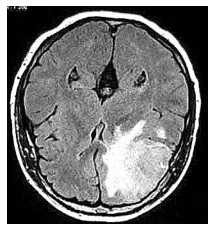

In [6]:
yes = list(data_dir.glob('yes/*'))
# PIL.Image.open(str(yes[0]))
# print(str(yes[0]))
image = plt.imread(str(yes[0]))
plt.imshow(image)
plt.axis('off')
plt.show()

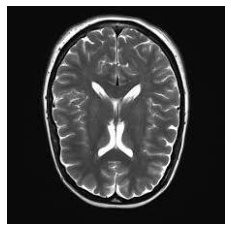

In [7]:
no = list(data_dir.glob('no/*'))
# PIL.Image.open(str(no[0]))
image = plt.imread(str(no[0]))
# print(image.shape)
plt.imshow(image)
plt.axis('off')
plt.show()

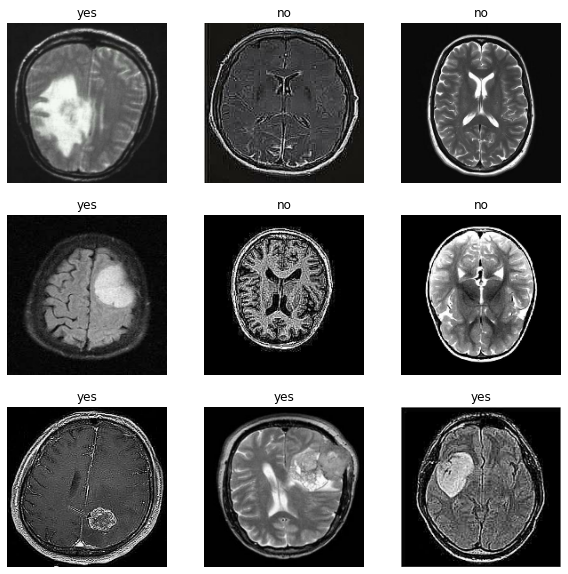

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## **Build the models**

In this section you will build the model with two approaches. 
First you should build it with the Sequential API and then you have to work with the Functional API in the second part. 

You can use the below link to know more about these two APIs.

Keep the architecture as simple as possible.

https://medium.com/analytics-vidhya/keras-model-sequential-api-vs-functional-api-fc1439a6fb10

## **1.Sequential API**

### **Build a model**

In [25]:

seq_model = Sequential()
seq_model.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))
seq_model.add(Conv2D(16, 3, padding='valid', activation='relu'))
seq_model.add(MaxPool2D())
seq_model.add(Conv2D(16, 5, padding='valid', activation='relu'))
seq_model.add(MaxPool2D())
seq_model.add(Conv2D(32, 5, padding='valid', activation='relu'))
seq_model.add(MaxPool2D())
seq_model.add(Flatten())
seq_model.add(Dense(32, activation='relu'))
seq_model.add(Dense(1, activation='sigmoid'))

In [26]:
seq_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 89, 89, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 85, 85, 16)        6416      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 42, 42, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 38, 38, 32)       

### **Train the model**

In [27]:
seq_model.compile(optimizer=Adam(),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

### **Test the model**

In [28]:
epochs=10
history = seq_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
75/75 [==============================] - 6s 72ms/step - loss: 0.4967 - accuracy: 0.7579 - val_loss: 0.3295 - val_accuracy: 0.8533
Epoch 2/10
75/75 [==============================] - 8s 98ms/step - loss: 0.2868 - accuracy: 0.8833 - val_loss: 0.2190 - val_accuracy: 0.9133
Epoch 3/10
75/75 [==============================] - 5s 69ms/step - loss: 0.1858 - accuracy: 0.9279 - val_loss: 0.1721 - val_accuracy: 0.9267
Epoch 4/10
75/75 [==============================] - 5s 69ms/step - loss: 0.0832 - accuracy: 0.9758 - val_loss: 0.1136 - val_accuracy: 0.9583
Epoch 5/10
75/75 [==============================] - 5s 67ms/step - loss: 0.0537 - accuracy: 0.9842 - val_loss: 0.0838 - val_accuracy: 0.9800
Epoch 6/10
75/75 [==============================] - 5s 69ms/step - loss: 0.0285 - accuracy: 0.9917 - val_loss: 0.1228 - val_accuracy: 0.9700
Epoch 7/10
75/75 [==============================] - 5s 69ms/step - loss: 0.0200 - accuracy: 0.9954 - val_loss: 0.0770 - val_accuracy: 0.9850
Epoch 8/10
75

### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

Text(0.5, 1.0, 'Training and Validation Accuracy')

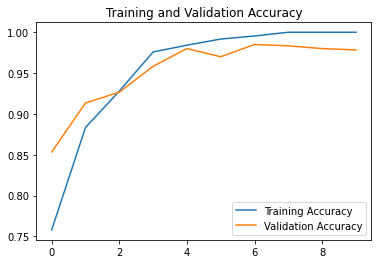

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')



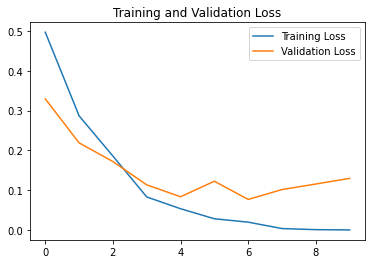

In [30]:

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## **2.Functional API**

### **Build a model**

In [31]:
input1 = Input(shape=(img_height, img_width, 3))
rs = Rescaling(1./255)(input1)
conv1 = Conv2D(16, 3, padding='valid', activation='relu')(rs)
mxp1 = MaxPool2D()(conv1)
conv2 = Conv2D(16, 5, padding='valid', activation='relu')(mxp1)
mxp2 = MaxPool2D()(conv2)
conv3 = Conv2D(32, 5, padding='valid', activation='relu')(mxp2)
mxp3 = MaxPool2D()(conv3)
flt = Flatten()(mxp3)
dens1 = Dense(32, activation='relu')(flt)
output = Dense(1, activation='sigmoid')(dens1)
func_model = Model(inputs=input1, outputs=output)
func_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 89, 89, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 85, 85, 16)        6416      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 42, 42, 16)       0         
 g2D)                                                      

### **Train the model**

In [32]:
func_model.compile(optimizer=Adam(),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

### **Test the model**

In [33]:
epochs=10
history = func_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
75/75 [==============================] - 6s 71ms/step - loss: 0.4861 - accuracy: 0.7704 - val_loss: 0.2965 - val_accuracy: 0.8817
Epoch 2/10
75/75 [==============================] - 5s 68ms/step - loss: 0.2856 - accuracy: 0.8763 - val_loss: 0.2135 - val_accuracy: 0.9250
Epoch 3/10
75/75 [==============================] - 5s 68ms/step - loss: 0.1627 - accuracy: 0.9425 - val_loss: 0.1209 - val_accuracy: 0.9650
Epoch 4/10
75/75 [==============================] - 5s 67ms/step - loss: 0.0781 - accuracy: 0.9787 - val_loss: 0.1161 - val_accuracy: 0.9667
Epoch 5/10
75/75 [==============================] - 5s 69ms/step - loss: 0.0415 - accuracy: 0.9904 - val_loss: 0.1037 - val_accuracy: 0.9733
Epoch 6/10
75/75 [==============================] - 5s 67ms/step - loss: 0.0264 - accuracy: 0.9933 - val_loss: 0.1361 - val_accuracy: 0.9700
Epoch 7/10
75/75 [==============================] - 5s 68ms/step - loss: 0.0120 - accuracy: 0.9983 - val_loss: 0.1101 - val_accuracy: 0.9733
Epoch 8/10
75

### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

Text(0.5, 1.0, 'Training and Validation Accuracy')

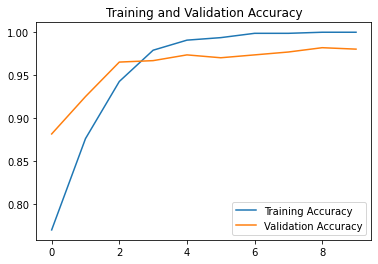

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')



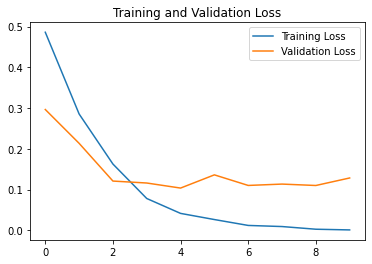

In [35]:

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()